<a href="https://colab.research.google.com/github/AleksandraOD/classification-apmath-21/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification-apmath-21/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification-apmath-21/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

df['Year'] = df['Day'].astype(str).str.slice(0, 4)
y_grouped = df.groupby('Year', as_index=False).mean()

# print(d_grouped)

y_min = y_grouped.loc[y_grouped['t'].idxmin()]['Year']
y_max = y_grouped.loc[y_grouped['t'].idxmax()]['Year']

print("Min", y_min)
print("Max", y_max)

Min 2012
Max 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [9]:
df['Year'] = df['Day'].astype(str).str.slice(0, 4)
df = df.drop(df[df['t'] <= 0].index)
y_grouped = df.groupby('Year')['Year'].count()

#y_min = y_grouped.idxmin()
y_max = y_grouped.idxmax()

#print("Min", y_min)
print("Max", y_max)

Max 2015


**3.** В каком году было самое холодное лето (по средней температуре)

In [10]:
df['Year'] = df['Day'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Day'].astype(str).str.slice(5, 7).astype(int)

df = df.drop(df[df['Month'] < 6].index)
df = df.drop(df[df['Month'] > 8].index)

y_grouped = df.groupby('Year', as_index=False).mean()

y_min = int(y_grouped.loc[y_grouped['t'].idxmax()]['Year'])

print(y_min)

2010


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [11]:
df["Delta t"] = abs(df['t'].diff().shift(-1))

print(df.loc[df['Delta t'].idxmax()])

Day        2008-08-31 00:00:00
t                           10
Year                      2008
Month                        8
Delta t                     15
Name: 242, dtype: object


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

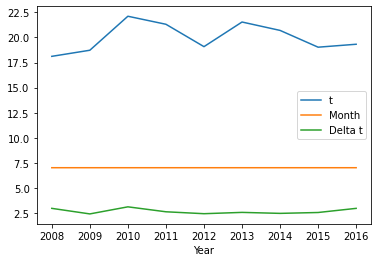

In [12]:
df['Year'] = df['Day'].astype(str).str.slice(0, 4)
y_grouped = df.groupby('Year').mean()

y_grouped.plot()
plt.show()